# Groundwater head data curation
This notebook describes setting up of groundwater head data for use with OLPROC.

## Background

## Aim and purpose
The purpose of this notebook is to curate raw head data for use with OLPROC. This notebook must be run before the notebook that curates `head-stage differences`.

Essential imports:

In [2]:
import os
import numpy as np
import pandas as pd
import pyemu
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})

import warnings

warnings.filterwarnings("ignore", category=DeprecationWarning)
plt.rcParams.update({'font.size': 14})

In [3]:
data_dir = os.path.join('..', '..', 'data', 'raw_data', 'head')
obs_dir =  os.path.join('..', '..', 'data', 'observations')
assert(data_dir)
assert(obs_dir)

In [4]:
os.listdir(data_dir)

['.ipynb_checkpoints',
 'B10-1.csv',
 'B14-1.csv',
 'B15-1.csv',
 'B16-1.csv',
 'B2-1.csv',
 'B2-2.csv',
 'B2-3.csv',
 'B22-1.csv',
 'B26.csv',
 'B29.csv',
 'B34.csv',
 'B35.csv',
 'B36.csv',
 'B37.csv',
 'B4.csv',
 'B8-2.csv',
 'B9-1.csv',
 'KB1-1.csv',
 'KB1-2.csv',
 'KB4-3.csv',
 'KB4-4.csv',
 'NI1403-2.csv',
 'NI1404-1.csv',
 'NI1405-1.csv',
 'NI1407-2.csv',
 'NI1408-1.csv',
 'NI1409-1.csv',
 'NI1410-1.csv',
 'NI1412-1.csv',
 'NI1412-3.csv',
 'NI15-O1.csv',
 'NI15-O44.csv',
 'NI15-O46.csv',
 'NI15-O47.csv',
 'NI15-O48.csv',
 'NI1501-3.csv',
 'NI1502-2.csv',
 'NI1504-2.csv',
 'NI1505-2.csv',
 'NI1506-1.csv',
 'NI1507-2.csv',
 'NI1601-3.csv',
 'NI1602-1.csv',
 'NI1603-1.csv',
 'NI1605-1.csv',
 'NI1606-1.csv',
 'NI1607-2.csv',
 'NI1608-1.csv',
 'NI1609-2.csv',
 'NI1610-2.csv',
 'NI1611-1.csv',
 'NI1612-1.csv',
 'NI1613-1.csv',
 'NI1701-1.csv',
 'NI1702-1.csv',
 'NI1703-1.csv',
 'NI1703-2.csv',
 'NI1704-1.csv',
 'NI1705-1.csv',
 'NI1706-1.csv',
 'NI1707-1.csv',
 'NI1708-1.csv',
 'NI170

- B10-1
- B15-1
- B2-1
- B35
- B36
- B37
- B4
- B8-2
- B9-1
- KB1-1
- KB4-3
- NI1412-3
- NI15-O1
- NI15-O44
- NI15-O46
- NI15-O47
- NI15-O48
- NI1501-3
- NI1603-1
- NI1607-2
- NI1611-1
- NI1612-1
- NI1613-1
- NI1703-1
- NI1712-1
- NI1802-1








Load up the raw data:

In [5]:
head_data = {}

In [6]:
for file in os.listdir(data_dir):
    if '.csv' in file:
        head_data[file.replace('.csv', '')] = pd.read_csv(os.path.join(data_dir, file))

In [7]:
for key,value in head_data.items():
    print(f'No. rows in {key}: {len(value)}')

No. rows in B10-1: 5
No. rows in B14-1: 3
No. rows in B15-1: 4
No. rows in B16-1: 3
No. rows in B2-1: 6347
No. rows in B2-2: 6347
No. rows in B2-3: 1759
No. rows in B22-1: 4
No. rows in B26: 4
No. rows in B29: 3
No. rows in B34: 4
No. rows in B35: 320
No. rows in B36: 320
No. rows in B37: 1921
No. rows in B4: 1759
No. rows in B8-2: 6
No. rows in B9-1: 5
No. rows in KB1-1: 2971
No. rows in KB1-2: 2518
No. rows in KB4-3: 2020
No. rows in KB4-4: 2021
No. rows in NI1403-2: 3
No. rows in NI1404-1: 5
No. rows in NI1405-1: 3
No. rows in NI1407-2: 4
No. rows in NI1408-1: 3
No. rows in NI1409-1: 1
No. rows in NI1410-1: 4
No. rows in NI1412-1: 328
No. rows in NI1412-3: 326
No. rows in NI15-O1: 6079
No. rows in NI15-O44: 8353
No. rows in NI15-O46: 3319
No. rows in NI15-O47: 2008
No. rows in NI15-O48: 6349
No. rows in NI1501-3: 3059
No. rows in NI1502-2: 4
No. rows in NI1504-2: 4
No. rows in NI1505-2: 3
No. rows in NI1506-1: 2
No. rows in NI1507-2: 5
No. rows in NI1601-3: 4
No. rows in NI1602-1: 4

Ensure datetime columns contain actual datetime values

In [8]:
for key,value in head_data.items():
    head_data[key]['datetime'] = pd.to_datetime(head_data[key]['datetime'])

### Visualize the data
Let's visualize the raw data just to familiarize ourselves with it:

In [9]:
df = pd.concat(head_data).reset_index()
df.rename(columns={'level_0': 'site'}, inplace=True) # Rename the column

<ipython-input-10-8cdc877dfffe>:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


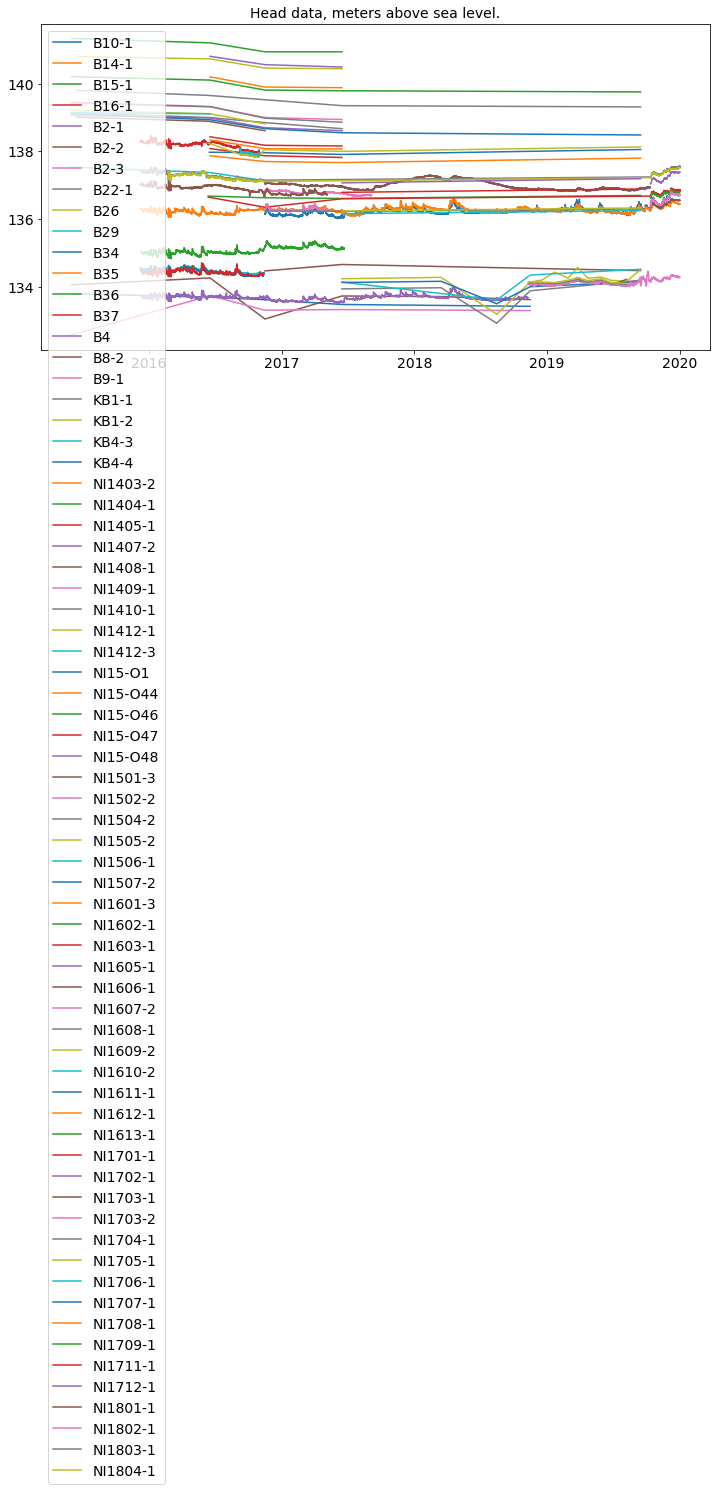

In [10]:
plt.figure(figsize=(12, 6))
for site in df['site'].unique():
    x = df.loc[df['site'] == site]['datetime']
    y = df.loc[df['site'] == site]['head']
    plt.plot(x, y, label=site)
plt.legend()
plt.title('Head data, meters above sea level.', fontsize=14)
plt.tight_layout()

### Resample head data
Resample the data into daily average values:

In [11]:
head_data_resamp = {}

In [12]:
for site, dataframe in head_data.items():
    head_data_resamp[site] = dataframe.resample('d', on='datetime').mean().dropna(how='all')

In [13]:
print('Data points after resampling to daily averages...')
for key,value in head_data_resamp.items():
    print(f'No. rows in {key}: {len(value)}')

Data points after resampling to daily averages...
No. rows in B10-1: 5
No. rows in B14-1: 3
No. rows in B15-1: 4
No. rows in B16-1: 3
No. rows in B2-1: 1060
No. rows in B2-2: 1060
No. rows in B2-3: 295
No. rows in B22-1: 4
No. rows in B26: 4
No. rows in B29: 3
No. rows in B34: 4
No. rows in B35: 54
No. rows in B36: 54
No. rows in B37: 325
No. rows in B4: 3
No. rows in B8-2: 6
No. rows in B9-1: 5
No. rows in KB1-1: 419
No. rows in KB1-2: 344
No. rows in KB4-3: 341
No. rows in KB4-4: 341
No. rows in NI1403-2: 3
No. rows in NI1404-1: 5
No. rows in NI1405-1: 3
No. rows in NI1407-2: 4
No. rows in NI1408-1: 3
No. rows in NI1409-1: 1
No. rows in NI1410-1: 4
No. rows in NI1412-1: 59
No. rows in NI1412-3: 55
No. rows in NI15-O1: 1018
No. rows in NI15-O44: 1398
No. rows in NI15-O46: 558
No. rows in NI15-O47: 339
No. rows in NI15-O48: 1064
No. rows in NI1501-3: 515
No. rows in NI1502-2: 4
No. rows in NI1504-2: 4
No. rows in NI1505-2: 3
No. rows in NI1506-1: 2
No. rows in NI1507-2: 5
No. rows in N

In [14]:
df_resampled = pd.concat(head_data_resamp).reset_index()
df_resampled.rename(columns={'level_0': 'site'}, inplace=True) # Rename the column

### Visualize both raw and processed data
Lines in color show raw data. Black lines show daily average data. It is the daily average data that will be used as input for OLPROC, as well as for comparison with head data for each individual site.

Text(0.5, 1.0, 'Head data, meters above sea level.')

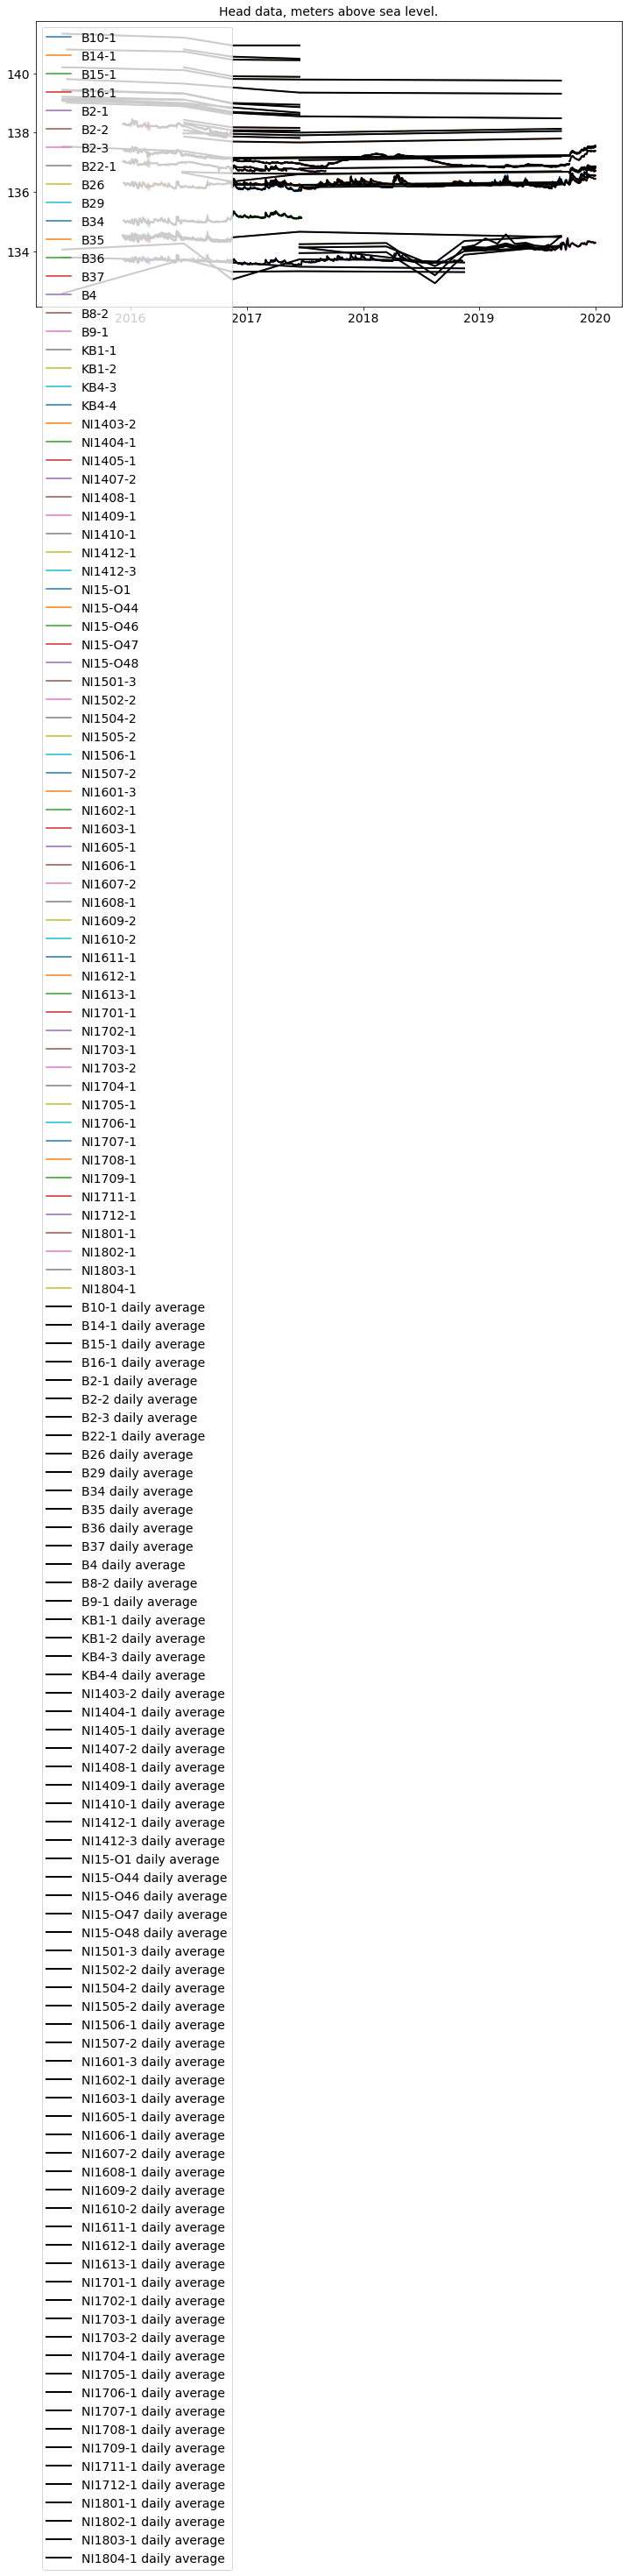

In [15]:
plt.figure(figsize=(12, 6))
for site in df['site'].unique():
    x = df.loc[df['site'] == site]['datetime']
    y = df.loc[df['site'] == site]['head']
    plt.plot(x, y, label=site)
for site in df_resampled['site'].unique():
    x = df_resampled.loc[df_resampled['site'] == site]['datetime']
    y = df_resampled.loc[df_resampled['site'] == site]['head']
    plt.plot(x, y, label=f'{site} daily average', color='black', linewidth=2)
plt.legend()
plt.title('Head data, meters above sea level.', fontsize=14)

Terrible, terrible plot. Anyways, it can be discerned that daily averages represent the raw data to a satisfactory degree, with the exception of a limited number of days where intra-day variations were substantial.

## Prepare datasets for OLPROC

In [23]:
df_resampled

,site,datetime,head,Unnamed: 2,Unnamed: 3
0,B10-1,2015-06-01,133.800,NaN,NaN
1,B10-1,2016-06-17,133.695,NaN,NaN
2,B10-1,2016-11-15,133.620,NaN,NaN
3,B10-1,2017-06-15,133.480,NaN,NaN
4,B10-1,2018-11-15,133.425,NaN,NaN
...,...,...,...,...,...
10623,NI1804-1,2019-03-26,134.268,NaN,NaN
10624,NI1804-1,2019-04-23,134.185,NaN,NaN
10625,NI1804-1,2019-05-28,134.240,NaN,NaN
10626,NI1804-1,2019-06-25,134.130,NaN,NaN


## Temp block for removing multilayer obs
This has no use in a 2d model but will be added for subsequent studies

In [22]:
df_resampled.site.unique()

array(['B10-1', 'B14-1', 'B15-1', 'B16-1', 'B2-1', 'B22-1', 'B26', 'B29',
       'B34', 'B35', 'B36', 'B37', 'B4', 'B8-2', 'B9-1', 'KB1-1', 'KB4-3',
       'NI1403-2', 'NI1404-1', 'NI1405-1', 'NI1407-2', 'NI1408-1',
       'NI1409-1', 'NI1410-1', 'NI1412-1', 'NI15-O1', 'NI15-O44',
       'NI15-O46', 'NI15-O47', 'NI15-O48', 'NI1501-3', 'NI1502-2',
       'NI1504-2', 'NI1505-2', 'NI1506-1', 'NI1507-2', 'NI1601-3',
       'NI1602-1', 'NI1603-1', 'NI1605-1', 'NI1606-1', 'NI1607-2',
       'NI1608-1', 'NI1609-2', 'NI1610-2', 'NI1611-1', 'NI1612-1',
       'NI1613-1', 'NI1701-1', 'NI1702-1', 'NI1703-1', 'NI1704-1',
       'NI1705-1', 'NI1706-1', 'NI1707-1', 'NI1708-1', 'NI1709-1',
       'NI1711-1', 'NI1712-1', 'NI1801-1', 'NI1802-1', 'NI1803-1',
       'NI1804-1'], dtype=object)

In [18]:
redundant_sites=['B2-2', 'B2-3', 'KB1-2', 'KB4-4', 'NI1412-3', 'NI1703-2']

In [19]:
df_resampled=df_resampled[~df_resampled['site'].isin(redundant_sites)]

In [27]:
df_resampled['site'] = df_resampled['site'].str.lower()

<ipython-input-27-12c0784869c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_resampled['site'] = df_resampled['site'].str.lower()


In [28]:
[i for i in df_resampled.site.unique()]

['b10-1',
 'b14-1',
 'b15-1',
 'b16-1',
 'b2-1',
 'b22-1',
 'b26',
 'b29',
 'b34',
 'b35',
 'b36',
 'b37',
 'b4',
 'b8-2',
 'b9-1',
 'kb1-1',
 'kb4-3',
 'ni1403-2',
 'ni1404-1',
 'ni1405-1',
 'ni1407-2',
 'ni1408-1',
 'ni1409-1',
 'ni1410-1',
 'ni1412-1',
 'ni15-o1',
 'ni15-o44',
 'ni15-o46',
 'ni15-o47',
 'ni15-o48',
 'ni1501-3',
 'ni1502-2',
 'ni1504-2',
 'ni1505-2',
 'ni1506-1',
 'ni1507-2',
 'ni1601-3',
 'ni1602-1',
 'ni1603-1',
 'ni1605-1',
 'ni1606-1',
 'ni1607-2',
 'ni1608-1',
 'ni1609-2',
 'ni1610-2',
 'ni1611-1',
 'ni1612-1',
 'ni1613-1',
 'ni1701-1',
 'ni1702-1',
 'ni1703-1',
 'ni1704-1',
 'ni1705-1',
 'ni1706-1',
 'ni1707-1',
 'ni1708-1',
 'ni1709-1',
 'ni1711-1',
 'ni1712-1',
 'ni1801-1',
 'ni1802-1',
 'ni1803-1',
 'ni1804-1']

In [16]:
loc_df = pd.read_excel(os.path.join(obs_dir, 'obs_head_per_layer.xlsx'))
display(loc_df)

,NAME,POINT_X,POINT_Y,LAYER
0,B9-2,426918.374000,6.654803e+06,1
1,B10-2,427074.709423,6.654805e+06,1
2,B12-1,427448.188505,6.655156e+06,1
3,B16-1,427409.547301,6.655023e+06,1
4,B2-1,427384.172044,6.655037e+06,1
...,...,...,...,...
140,NI1705-2,427215.444386,6.654958e+06,3
141,NI1706-2,427250.038227,6.654940e+06,3
142,NI1707-1,427229.096032,6.654943e+06,3
143,NI1708-1,427447.873358,6.654978e+06,3


In [17]:
df_resampled['layer'] = 0
df_resampled

,site,datetime,head,layer
0,B2-1,2016-11-15,137.053540,0
1,B2-1,2016-11-16,137.048832,0
2,B2-1,2016-11-17,137.053302,0
3,B2-1,2016-11-18,137.053829,0
4,B2-1,2016-11-19,137.055800,0
...,...,...,...,...
10451,NI1802-1,2019-12-28,134.276667,0
10452,NI1802-1,2019-12-29,134.291667,0
10453,NI1802-1,2019-12-30,134.303333,0
10454,NI1802-1,2019-12-31,134.290000,0


In [18]:
for well in df_resampled.site.unique():
    print(well)

B2-1
B2-2
B2-3
B35
B36
B37
KB1-1
KB1-2
KB4-3
KB4-4
NI1412-1
NI1412-3
NI15-O1
NI15-O44
NI15-O46
NI15-O47
NI15-O48
NI1501-3
NI1603-1
NI1607-2
NI1611-1
NI1612-1
NI1613-1
NI1703-1
NI1703-2
NI1712-1
NI1802-1


In [19]:
loc_df

,NAME,POINT_X,POINT_Y,LAYER
0,B9-2,426918.374000,6.654803e+06,1
1,B10-2,427074.709423,6.654805e+06,1
2,B12-1,427448.188505,6.655156e+06,1
3,B16-1,427409.547301,6.655023e+06,1
4,B2-1,427384.172044,6.655037e+06,1
...,...,...,...,...
140,NI1705-2,427215.444386,6.654958e+06,3
141,NI1706-2,427250.038227,6.654940e+06,3
142,NI1707-1,427229.096032,6.654943e+06,3
143,NI1708-1,427447.873358,6.654978e+06,3


In [20]:
df = df_resampled.merge(loc_df, left_on='site', right_on='NAME')[['site', 'datetime', 'head', 'LAYER']]
df

,site,datetime,head,LAYER
0,B2-1,2016-11-15,137.053540,1
1,B2-1,2016-11-16,137.048832,1
2,B2-1,2016-11-17,137.053302,1
3,B2-1,2016-11-18,137.053829,1
4,B2-1,2016-11-19,137.055800,1
...,...,...,...,...
10451,NI1802-1,2019-12-28,134.276667,1
10452,NI1802-1,2019-12-29,134.291667,1
10453,NI1802-1,2019-12-30,134.303333,1
10454,NI1802-1,2019-12-31,134.290000,1


In [21]:
df_lyr1 = df.loc[df['LAYER'] == 1]
df_lyr2 = df.loc[df['LAYER'] == 2]
df_lyr3 = df.loc[df['LAYER'] == 3]

OLPROC reads site sample files (ssf/smp), which is long format data. The following section describes the exportation of the resampled dataset to a site sample file using `pyemu.utils.smp_utils.dataframe_to_smp`

In [22]:
output_dir = os.path.join('..', '..', 'data', 'olproc_input')

Perhaps a redundant step, but for brevities sake let's change the clock hour for each `datetime` entry from `00:00:00` to `12:00:00`, to better reflect that data represent daily average stage:

In [23]:
for df in [df_lyr1, df_lyr2, df_lyr3]:
    df['datetime'] = [i.replace(hour=12) for i in df['datetime']]

<ipython-input-23-613838095f2b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime'] = [i.replace(hour=12) for i in df['datetime']]


In [24]:
display(df_lyr1)

,site,datetime,head,LAYER
0,B2-1,2016-11-15 12:00:00,137.053540,1
1,B2-1,2016-11-16 12:00:00,137.048832,1
2,B2-1,2016-11-17 12:00:00,137.053302,1
3,B2-1,2016-11-18 12:00:00,137.053829,1
4,B2-1,2016-11-19 12:00:00,137.055800,1
...,...,...,...,...
10451,NI1802-1,2019-12-28 12:00:00,134.276667,1
10452,NI1802-1,2019-12-29 12:00:00,134.291667,1
10453,NI1802-1,2019-12-30 12:00:00,134.303333,1
10454,NI1802-1,2019-12-31 12:00:00,134.290000,1


Export to smp-file (note that an alternative version below exports headobs per layer):

In [27]:
pyemu.utils.smp_utils.dataframe_to_smp(
    pd.concat([df_lyr1, df_lyr2, df_lyr3]),
    os.path.join(output_dir, 'obs-head-all.ssf'),
    name_col='site',
    datetime_col='datetime',
    value_col='head',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

---

## End of Notebook

Use `pyemu.utils.smp_utils.dataframe_to_smp` to create a site sample file:

In [77]:
pyemu.utils.smp_utils.dataframe_to_smp(
    df_lyr1[['site', 'datetime', 'head']],
    os.path.join(output_dir, 'obs-head1.ssf'),
    name_col='site',
    datetime_col='datetime',
    value_col='head',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

In [78]:
pyemu.utils.smp_utils.dataframe_to_smp(
    df_lyr2[['site', 'datetime', 'head']],
    os.path.join(output_dir, 'obs-head2.ssf'),
    name_col='site',
    datetime_col='datetime',
    value_col='head',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

In [79]:
pyemu.utils.smp_utils.dataframe_to_smp(
    df_lyr3[['site', 'datetime', 'head']],
    os.path.join(output_dir, 'obs-head3.ssf'),
    name_col='site',
    datetime_col='datetime',
    value_col='head',
    datetime_format='dd/mm/yyyy',
    value_format='{0:15.6E}',
    max_name_len=12
)

Done.